# Milestone Two 

RMSE: 36575204454.10
R²: 0.516


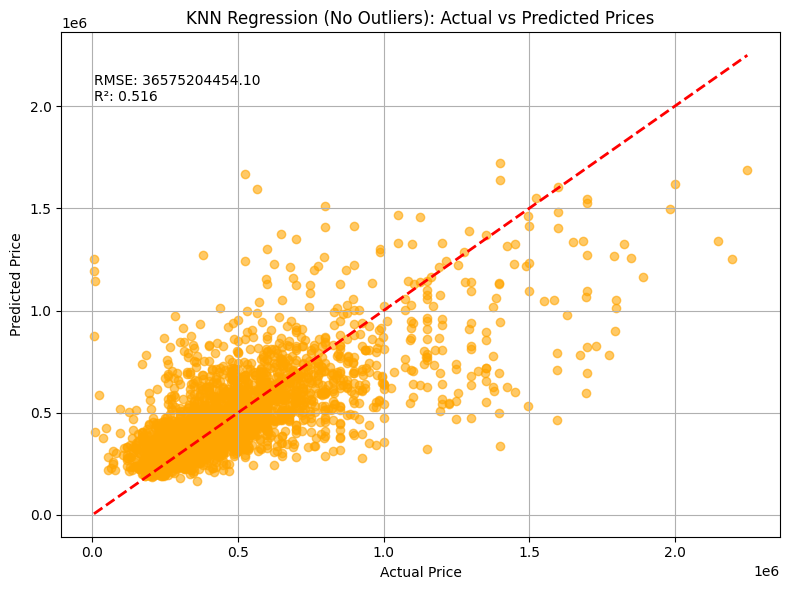

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("austinHousingData.csv")  # update path if needed

# Select numerical features and target
features = [
    'livingAreaSqFt', 'lotSizeSqFt', 'yearBuilt', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories', 'garageSpaces',
    'propertyTaxRate', 'avgSchoolRating'
]
target = 'latestPrice'

# Drop rows with missing values
df_model = df[features + [target]].dropna()

# Remove outliers (top 1% most expensive houses)
price_threshold = df_model[target].quantile(0.99)
df_filtered = df_model[df_model[target] <= price_threshold]

# Split into features and target
X = df_filtered[features]
y = df_filtered[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')  # Try 'manhattan' or 'chebyshev'
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression (No Outliers): Actual vs Predicted Prices")
plt.text(x=y_test.min(), y=y_test.max()*0.9, s=f"RMSE: {rmse:.2f}\nR²: {r2:.3f}", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


Gradient Boosting RMSE: 28776581621.07
Gradient Boosting R²: 0.619


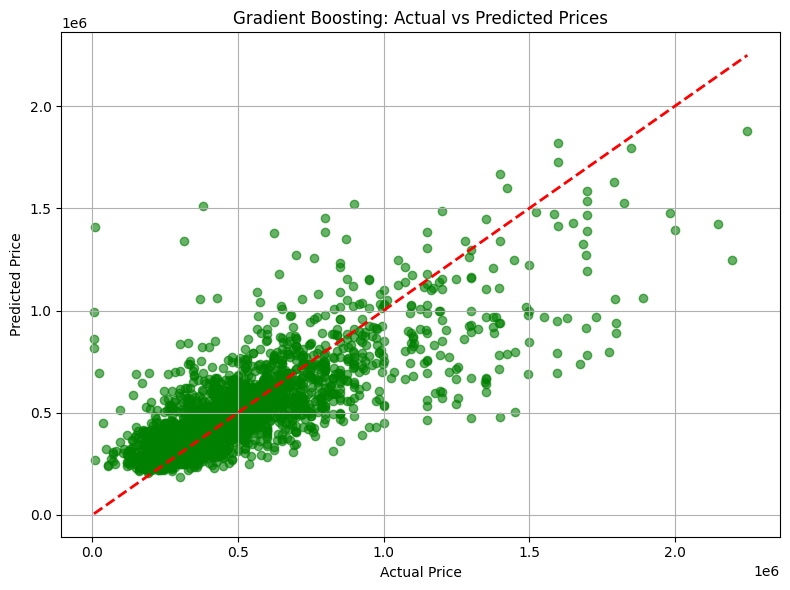

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("austinHousingData.csv")

# Select features and target
features = [
    'livingAreaSqFt', 'lotSizeSqFt', 'yearBuilt', 'numOfBathrooms',
    'numOfBedrooms', 'numOfStories', 'garageSpaces',
    'propertyTaxRate', 'avgSchoolRating'
]
target = 'latestPrice'

# Drop missing values
df_model = df[features + [target]].dropna()

# Remove outliers (top 1% of price)
price_threshold = df_model[target].quantile(0.99)
df_filtered = df_model[df_model[target] <= price_threshold]

# Define X and y
X = df_filtered[features]
y = df_filtered[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict
y_pred = gbr.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting RMSE: {rmse:.2f}")
print(f"Gradient Boosting R²: {r2:.3f}")

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
